# Company_Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessingle=preprocessing.LabelEncoder()


In [3]:
company = pd.read_csv('C://Users//Lenovo//Downloads//Assignment//Decision Trees//Company_Data.csv')

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
le=preprocessing.LabelEncoder()
for column_name in company.columns:
    if company[column_name].dtype == object:
        company[column_name] = le.fit_transform(company[column_name])
    else:
        pass

In [6]:
x=company.iloc[:,0:10]
y=company['US']

<AxesSubplot:>

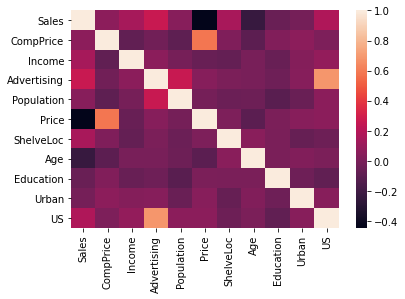

In [8]:
import seaborn as sns
sns.heatmap(company.corr())

In [9]:
company['US'].unique()

array([1, 0])

In [10]:
company.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [12]:
model=DecisionTreeClassifier(random_state=1,max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

[Text(167.4, 181.2, 'X[3] <= 0.5\ngini = 0.459\nsamples = 320\nvalue = [114, 206]'),
 Text(83.7, 108.72, 'X[2] <= 100.5\ngini = 0.18\nsamples = 110\nvalue = [99, 11]'),
 Text(41.85, 36.23999999999998, 'gini = 0.121\nsamples = 93\nvalue = [87, 6]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 6.5\ngini = 0.133\nsamples = 210\nvalue = [15, 195]'),
 Text(209.25, 36.23999999999998, 'gini = 0.361\nsamples = 55\nvalue = [13, 42]'),
 Text(292.95, 36.23999999999998, 'gini = 0.025\nsamples = 155\nvalue = [2, 153]')]

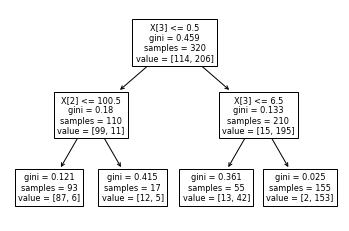

In [13]:
tree.plot_tree(model)

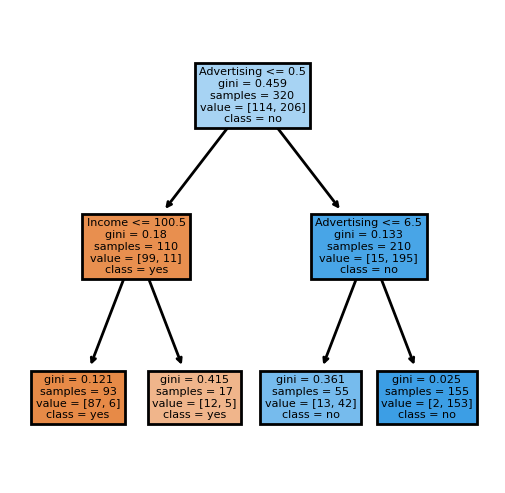

In [14]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['yes','no']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=200)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);


In [15]:
preds=model.predict(x_test) #predicting on test data set
pd.Series(preds).value_counts()

1    46
0    34
dtype: int64

In [16]:
pd.crosstab(y_test,preds)

col_0,0,1
US,,
0,26,2
1,8,44


In [17]:
np.mean(preds==y_test)

0.875

In [18]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [19]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.875

# Fraud-Check

In [21]:
fraud = pd.read_csv('C://Users//Lenovo//Downloads//Assignment//Decision Trees//Fraud_check.csv',)

In [22]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [23]:
fraud.loc[fraud["Taxable.Income"]>=30000,"Income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"Income"]="Risky"

In [24]:
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud [column_name].dtype==object:
        fraud[column_name]=le.fit_transform(fraud[column_name])
    else:
        pass

In [25]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [26]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)

In [27]:
x= fraud.iloc[:,0:5]
y= fraud.iloc[:,5]

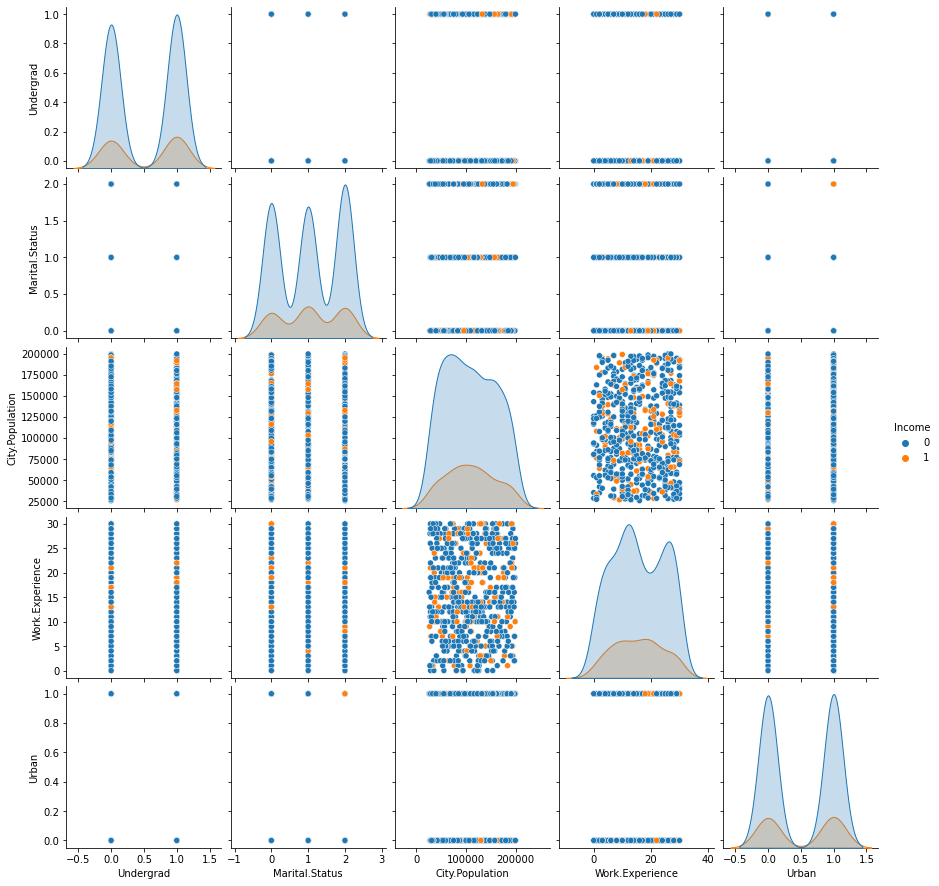

In [28]:
sns.pairplot(data=fraud, hue = 'Income')

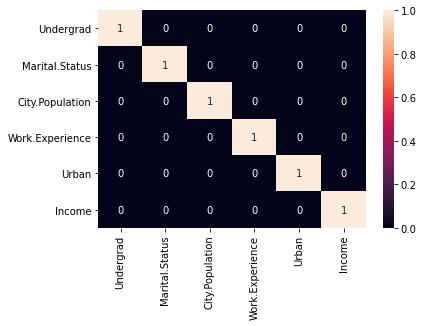

In [29]:
sns.heatmap(fraud.corr()>0.6, annot = True)
plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 10)

In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

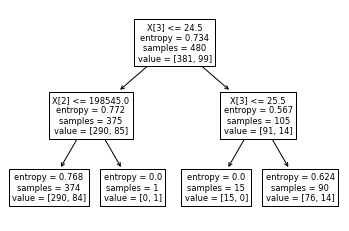

In [32]:
tree.plot_tree(model);

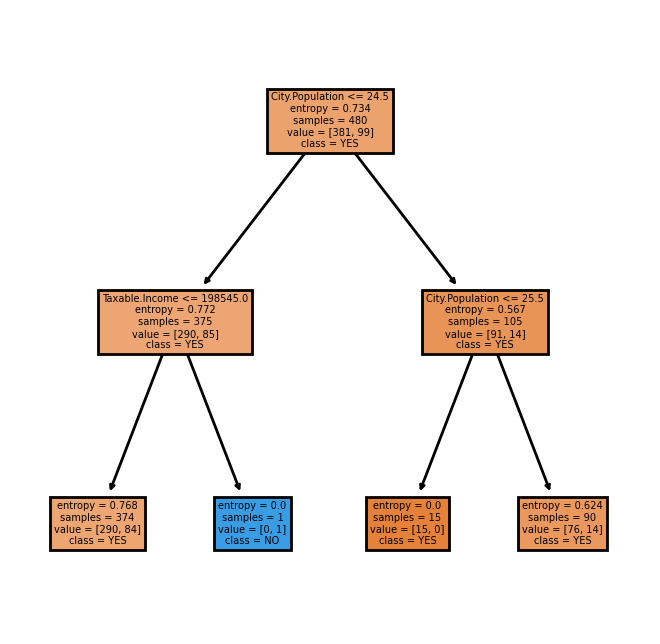

In [33]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    119
1      1
dtype: int64

In [36]:
#Good,Risky
model.predict_proba(x_test)

array([[0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.84444444, 0.15555556],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.84444444, 0.15555556],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.84444444, 0.15555556],
       [0.77540107, 0.22459893],
       [0.84444444, 0.15555556],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.84444444, 0.15555556],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [1.        , 0.        ],
       [0.77540107, 0.22459893],
       [0.77540107, 0.22459893],
       [0.

In [37]:
pd.crosstab(y_test,preds) 

col_0,0,1
Income,,
0,94,1
1,25,0


In [38]:
np.mean(preds==y_test)

0.7833333333333333

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [40]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7833333333333333